### Loading and prerequesites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_insekt.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_insekt.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_insekt.pkl")

### Load dataset

In [3]:
df_sentiment = pd.read_pickle("../Data/df_sentiment.pkl")

In [4]:
# Merge the two dataframes while keeping only the rows that appear in both dataframes and only retaining the columns nexis_id, publication_year, sentiment, positive, neutral, negative, sentences, text_x
df = pd.merge(df, df_sentiment, on="nexis_id", how="inner")
df = df[["nexis_id", "publication_year_y", "text_x", "sentiment", "positive", "neutral", "negative", "sentences"]]

# Rename the column publication_year_y to publication_year
df = df.rename(columns={"publication_year_y": "publication_year"})

# Rename the column text_x to text
df = df.rename(columns={"text_x": "text"})

df.head()

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
0,6353TNT1DXFJ54180000000,2021,Mehrere Dutzend europäische Unternehmen sehen ...,neutral,0.0,34.0,0.0,34.0
1,63MMKPN1JB0GF3X10000000,2021,Der britische Prinz William hat die 15 Finalis...,neutral,0.0,13.0,0.0,13.0
2,5GCJHJ51DXG7T4F90000000,2015,WASHINGTON. Für gentechnisch veränderte Lebens...,neutral,1.0,12.0,1.0,14.0
3,5KJ2DK21JB1634030000000,2016,Die Lebensmittelverordnung der Schweiz erlaubt...,neutral,3.0,60.0,2.0,65.0
4,5ND5H3X1JB16317X0000000,2017,Wolfhalden Gastro Appenzellerland AR schloss ...,neutral,1.0,29.0,1.0,31.0


### General overview

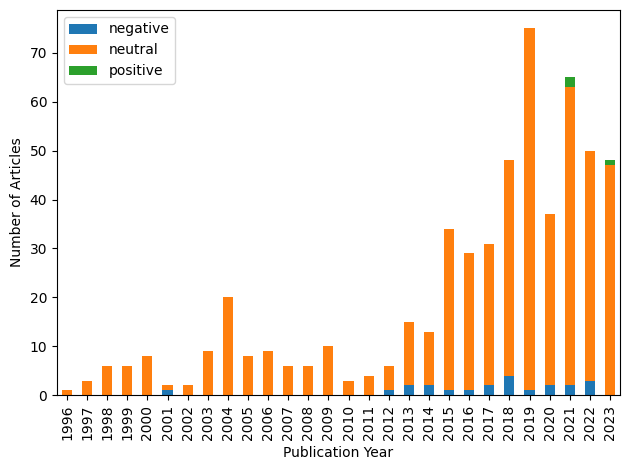

In [5]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_insekt_per_article_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                 -0.037
Method:                       Least Squares   F-statistic:                   0.02529
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.875
Time:                              09:57:53   Log-Likelihood:                 24.884
No. Observations:                        28   AIC:                            -45.77
Df Residuals:                            26   BIC:                            -43.10
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

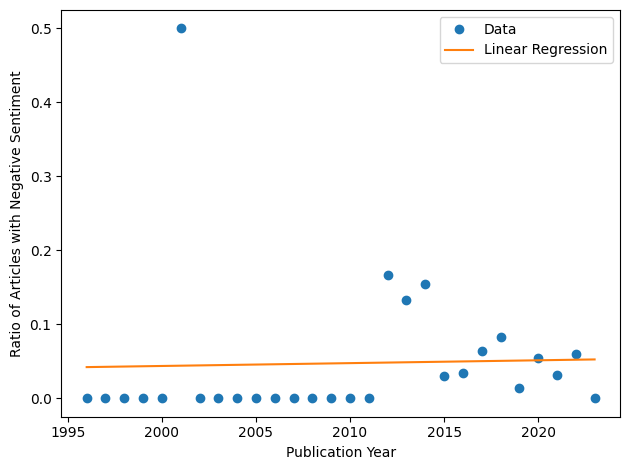

In [6]:
# Visualize the ratio of articles with negative sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with negative sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'negative').sum()})

# Calculate the ratio of articles with negative sentiment to total articles for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_insekt_articles_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.172
Model:                                  OLS   Adj. R-squared:                  0.140
Method:                       Least Squares   F-statistic:                     5.390
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):             0.0284
Time:                              09:57:53   Log-Likelihood:                 102.75
No. Observations:                        28   AIC:                            -201.5
Df Residuals:                            26   BIC:                            -198.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

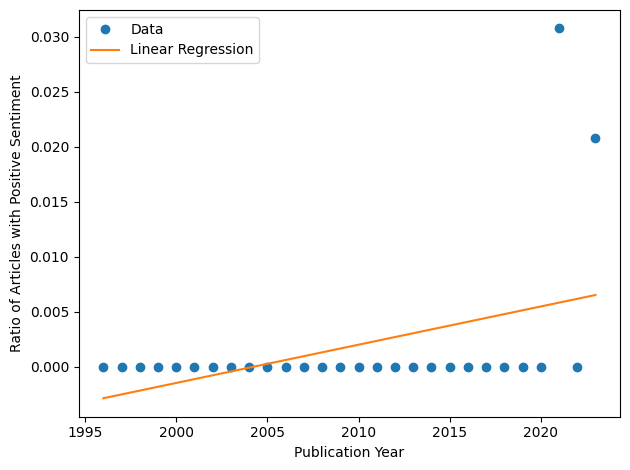

In [7]:
# Visualize the ratio of articles with positive sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with positive sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'positive').sum()})

# Calculate the ratio of articles with positive sentiment to total articles for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_insekt_articles_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.004
Model:                                 OLS   Adj. R-squared:                 -0.035
Method:                      Least Squares   F-statistic:                   0.09257
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):              0.763
Time:                             09:57:53   Log-Likelihood:                 25.006
No. Observations:                       28   AIC:                            -46.01
Df Residuals:                           26   BIC:                            -43.35
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

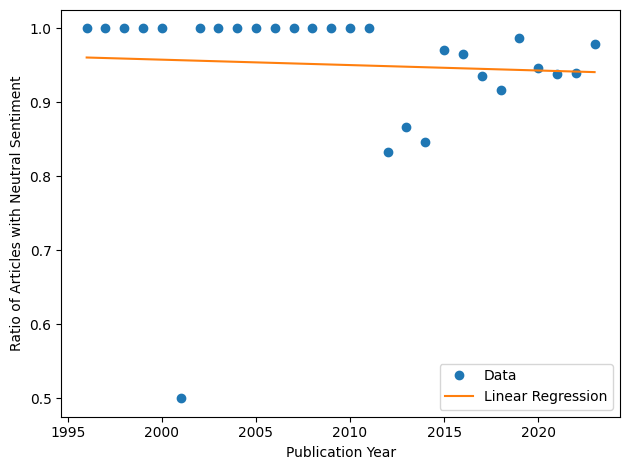

In [8]:
# Visualize the ratio of articles with neutral sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with neutral sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'neutral').sum()})

# Calculate the ratio of articles with neutral sentiment to total articles for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_insekt_articles_ratio.png')
plt.show()

### Further analysis of positive articles

In [9]:
positive_articles = df[df['sentiment'] == 'positive']
positive_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
69,67JBGC51JDMNJ06M0000000,2023,Die Zunahme der Weltbevölkerung und geänderte ...,positive,1.0,13.0,0.0,14.0
85,64CGHB91DY69V2HP0000000,2021,"I. Tolkien, ein gläubiger Katholik, leitete se...",positive,14.0,263.0,21.0,298.0
254,63T712K1DY69V4NH0000000,2021,Das ist schon kurios. Da treffen sich Tausende...,positive,0.0,6.0,3.0,9.0


### Further analysis of negative articles

In [10]:
negative_articles = df[df['sentiment'] == 'negative']
negative_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
39,61JHRRV1DY69V4BF0000000,2020,MMeine Tochter ist 18 Jahre alt. Früher habe i...,negative,2.0,25.0,18.0,45.0
46,63VTKHB1DY2BS2240000000,2021,Die Pandemie war ein harter Schlag für das Gas...,negative,13.0,54.0,35.0,102.0
78,485WPMX0TWB9W2Y90000000,2001,"""Holzaugen, warum starrt ihr mich so an?"" Carl...",negative,4.0,317.0,33.0,354.0
84,5TPCRWT1JC3P003N0000000,2018,"Andreas Ahrens, 39, ist Leiter des Disgusting ...",negative,3.0,13.0,9.0,25.0
107,5T6JWWS1JCR4R5250000000,2018,Urlaub? Wie langweilig. Dieser Tage kommt man ...,negative,3.0,10.0,2.0,15.0
160,5BNPJ0C1JDPTM4690000000,2014,"Gerne. Unter meinem Vorgänger, ja. Der Kollege...",negative,5.0,32.0,12.0,49.0
214,64S2VCM1JBPW94B60000000,2022,"Kakerlaken, Mehlkäfer und Buffalowürmer haben ...",negative,3.0,37.0,3.0,43.0
219,554VJT31JC4571DJ0000000,2012,"Zum Artikel ""Insekten als Ausweg?"" von Alexand...",negative,0.0,7.0,2.0,9.0
222,64S3BPV1DYK6Y1YG0000000,2022,von Marie von der Tann Katzen und Hunde sind F...,negative,5.0,48.0,14.0,67.0
278,5CNDK981JC1003FS0000000,2014,"Frau Rützler, was verstehen Sie unter einem Fo...",negative,8.0,80.0,8.0,96.0


### Analysis per sentence

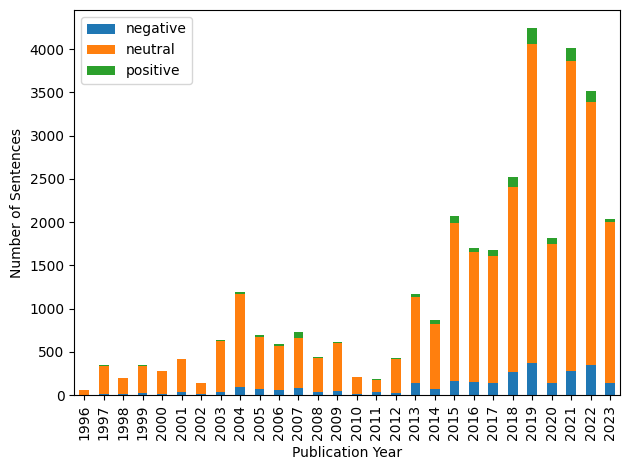

In [11]:
# Group the dataframe by publication_year and calculate the sum of positive, negative, and neutral values for each year
grouped_df = df.groupby('publication_year')[['negative', 'neutral', 'positive']].sum()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Sentences')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_insekt_per_sentence_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.019
Model:                                  OLS   Adj. R-squared:                 -0.018
Method:                       Least Squares   F-statistic:                    0.5131
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.480
Time:                              09:57:54   Log-Likelihood:                 57.556
No. Observations:                        28   AIC:                            -111.1
Df Residuals:                            26   BIC:                            -108.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

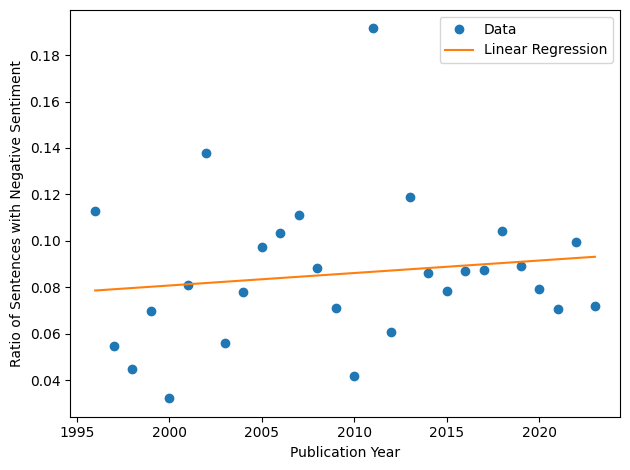

In [12]:
# Group by year and calculate the sum of negative and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'negative': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with negative sentiment to total sentences for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['negative'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_insekt_sentences_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.126
Model:                                  OLS   Adj. R-squared:                  0.092
Method:                       Least Squares   F-statistic:                     3.751
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):             0.0637
Time:                              09:57:54   Log-Likelihood:                 73.975
No. Observations:                        28   AIC:                            -143.9
Df Residuals:                            26   BIC:                            -141.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

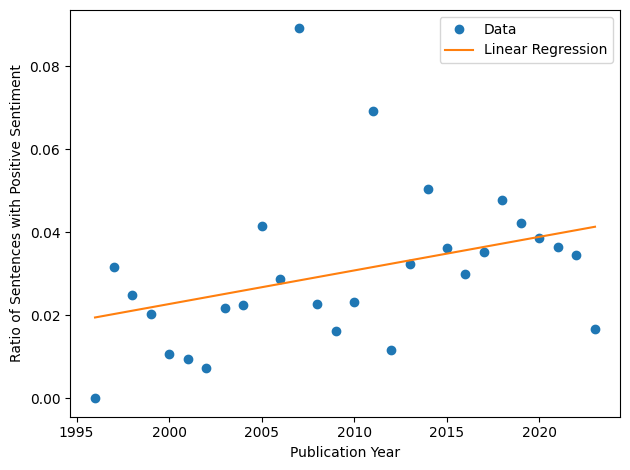

In [13]:
# Group by year and calculate the sum of positive and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'positive': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with positive sentiment to total sentences for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['positive'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_insekt_sentences_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.065
Model:                                 OLS   Adj. R-squared:                  0.029
Method:                      Least Squares   F-statistic:                     1.820
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):              0.189
Time:                             09:57:54   Log-Likelihood:                 49.576
No. Observations:                       28   AIC:                            -95.15
Df Residuals:                           26   BIC:                            -92.49
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

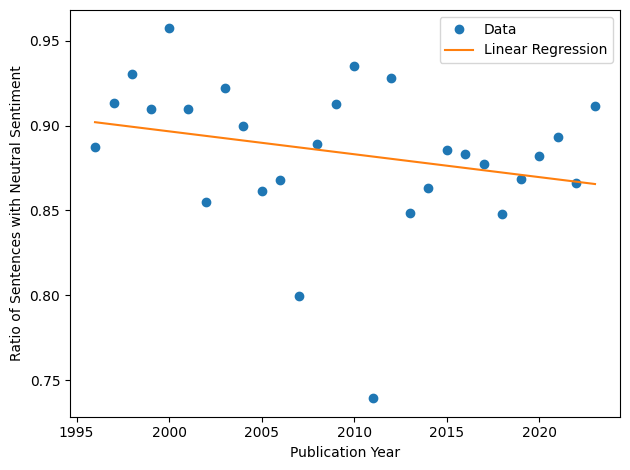

In [14]:
# Group by year and calculate the sum of neutral and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'neutral': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with neutral sentiment to total sentences for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['neutral'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_insekt_sentences_ratio.png')
plt.show()

### Explore anomalies

In [15]:
df_sorted = df.sort_values('positive', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
231,4PYHHPR0TWTB81F20000000,2007,Zusammenfassung Mittels eines überwiegend inte...,neutral,64.0,464.0,64.0,592.0
232,5XMWBF71JC1003NP0000000,2019,1 Einleitung Viele gesamtgesellschaftliche The...,neutral,32.0,351.0,45.0,428.0
395,5YH0KVK1JCSWK0MF0000000,2020,Angesichts des aktuellen SARS-CoV-2-Ausbruchs ...,neutral,29.0,118.0,37.0,184.0
154,5XVM4CJ1DY2BS0P60000000,2019,Wer am Flughafen Tokio-Haneda sein Abfluggate ...,neutral,19.0,124.0,31.0,174.0
167,66BFH441F15WB2P80000000,2022,"Mein Erweckungserlebnis war, ganz klar, das Co...",neutral,18.0,158.0,52.0,228.0
12,5CDK6T51DY2BS0W10000000,2014,Text: ; Mitarbeit: Doris Huber Das Wirtschafts...,neutral,15.0,176.0,20.0,211.0
85,64CGHB91DY69V2HP0000000,2021,"I. Tolkien, ein gläubiger Katholik, leitete se...",positive,14.0,263.0,21.0,298.0
499,597TGXH1JC3GN39H0000000,2013,Marcus G. Lindner machte das Mesa zum besten R...,negative,14.0,63.0,33.0,110.0
290,5N0CN451DYG1P38C0000000,2017,"Deutschland Welt Wer darauf achtet, sieht die ...",neutral,13.0,211.0,14.0,238.0
46,63VTKHB1DY2BS2240000000,2021,Die Pandemie war ein harter Schlag für das Gas...,negative,13.0,54.0,35.0,102.0


In [16]:
df_sorted = df.sort_values('negative', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
231,4PYHHPR0TWTB81F20000000,2007,Zusammenfassung Mittels eines überwiegend inte...,neutral,64.0,464.0,64.0,592.0
167,66BFH441F15WB2P80000000,2022,"Mein Erweckungserlebnis war, ganz klar, das Co...",neutral,18.0,158.0,52.0,228.0
365,66FVD341DY4BY4M80000000,2022,Ein Samstagvormittag in einem Shoppingcenter i...,neutral,7.0,166.0,46.0,219.0
232,5XMWBF71JC1003NP0000000,2019,1 Einleitung Viele gesamtgesellschaftliche The...,neutral,32.0,351.0,45.0,428.0
359,5T2D0T71JDRRB0JP0000000,2018,Die Mehlwürmer bewahrt Andrea Staudacher im Vo...,negative,8.0,83.0,40.0,131.0
395,5YH0KVK1JCSWK0MF0000000,2020,Angesichts des aktuellen SARS-CoV-2-Ausbruchs ...,neutral,29.0,118.0,37.0,184.0
523,57VVX7K1JDJ5S1560000000,2013,VON PHILIPP BRANDSTÄDTER Weil es die richtige ...,negative,4.0,64.0,35.0,103.0
46,63VTKHB1DY2BS2240000000,2021,Die Pandemie war ein harter Schlag für das Gas...,negative,13.0,54.0,35.0,102.0
140,4J5BS4W0TWCNF2010000000,2006,Was ißt der Verfechter von Bio-Kost Claus Hipp...,neutral,11.0,110.0,34.0,155.0
78,485WPMX0TWB9W2Y90000000,2001,"""Holzaugen, warum starrt ihr mich so an?"" Carl...",negative,4.0,317.0,33.0,354.0
